# Assignment 2: Engineering Predictive Features

**Student Name:** Nash Gagliano

**Date:** 2/8/2026

---

## Assignment Overview

In this assignment, you'll practice feature engineering by creating new predictive features from the Ames Housing dataset. You'll build a baseline model with raw features, engineer at least 5 new features based on real estate intuition, and measure how feature engineering improves model performance.

---

## Step 1: Import Libraries and Load Data

In [49]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries imported successfully")


✓ Libraries imported successfully


In [50]:
# Load the Ames Housing dataset
df = pd.read_csv("data/train.csv")  # Load train.csv from the data folder

# Display basic information
print(df.head())          # Show first 5 rows
print("\nDataset Info:")
print(df.info())          # Column types and non-null counts
print("\nDataset Description:")
print(df.describe())      # Summary statistics for numeric columns

print("\n" + "="*80)
print("CHECKPOINT: Verify dataset loaded correctly")
print(f"Dataset shape: {df.shape if df is not None else 'Not loaded'}")
print("="*80)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

---
## Step 2: Build Baseline Model with Raw Features

### Select Raw Features for Baseline

Select 10-15 raw features to use in your baseline model. Here's a suggested starting set (you can adjust):

**Suggested features:**
- `GrLivArea` - Above grade living area square feet
- `OverallQual` - Overall material and finish quality
- `YearBuilt` - Original construction year
- `TotalBsmtSF` - Total basement square feet
- `FullBath` - Full bathrooms above grade
- `BedroomAbvGr` - Bedrooms above grade
- `GarageArea` - Size of garage in square feet
- `LotArea` - Lot size in square feet
- `Neighborhood` - Physical location (categorical)
- Add 5-10 more features you think are important

In [51]:
# Target variable
y = df['SalePrice']

# Feature matrix
X_baseline = df[baseline_features].copy()

# Separate numeric and categorical columns
numeric_cols = ['GrLivArea', 'OverallQual', 'YearBuilt', 'LotArea', 'FullBath']
categorical_cols = ['Neighborhood']

# Convert numeric columns to numbers (coerce errors to NaN)
for col in numeric_cols:
    X_baseline[col] = pd.to_numeric(X_baseline[col], errors='coerce')
    X_baseline[col] = X_baseline[col].fillna(X_baseline[col].median())

# Fill categorical missing values
for col in categorical_cols:
    X_baseline[col] = X_baseline[col].fillna('None')

# Encode categorical variables
X_baseline = pd.get_dummies(X_baseline, drop_first=True)

print(f"Baseline features selected: {len(baseline_features)}")
print(f"X_baseline shape: {X_baseline.shape}")
print(f"Target variable shape: {y.shape}")


Baseline features selected: 6
X_baseline shape: (1460, 29)
Target variable shape: (1460,)


### Preprocess Baseline Features

In [52]:
# Handle missing values
# TODO: Fill missing values appropriately
# Numeric: Use median or 0
# Categorical: Use 'None' or most frequent


# Encode categorical variables
# TODO: Use pd.get_dummies() for categorical features


print("\n" + "="*80)
print("CHECKPOINT: After preprocessing")
print(f"X_baseline shape: {X_baseline.shape if X_baseline is not None else 'Not defined'}")
print(f"Missing values: {X_baseline.isnull().sum().sum() if X_baseline is not None else 'N/A'}")
print("="*80)


CHECKPOINT: After preprocessing
X_baseline shape: (1460, 29)
Missing values: 0


### Train Baseline Model

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X_baseline, y, test_size=0.2, random_state=42
)

baseline_model = RandomForestRegressor(n_estimators=100, random_state=42)
baseline_model.fit(X_train, y_train)

baseline_predictions = baseline_model.predict(X_test)

baseline_r2 = r2_score(y_test, baseline_predictions)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))

print("\n" + "="*80)
print("BASELINE MODEL RESULTS")
print("="*80)
print(f"R² Score: {baseline_r2:.4f}")
print(f"RMSE: ${baseline_rmse:,.2f}")
print("="*80)



BASELINE MODEL RESULTS
R² Score: 0.8771
RMSE: $30,706.37


### Visualize Baseline Feature Importances

                 Feature  Importance
1            OverallQual    0.594307
0              GrLivArea    0.201762
2              YearBuilt    0.076545
3                LotArea    0.073954
4               FullBath    0.012114
19  Neighborhood_NoRidge    0.008139
11  Neighborhood_Edwards    0.005616
10  Neighborhood_Crawfor    0.002919
21  Neighborhood_OldTown    0.002791
20  Neighborhood_NridgHt    0.002476


/var/folders/y3/12k84p5d0l1fm03hkrntmxg40000gn/T/ipykernel_51481/1970895237.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


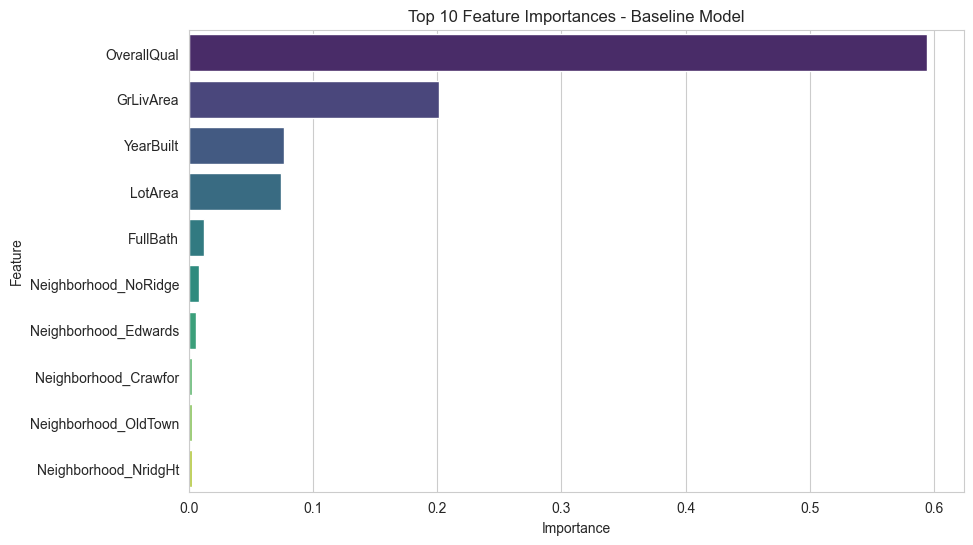

In [54]:
importances = baseline_model.feature_importances_
feature_names = X_baseline.columns

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

top_features = feature_importances.head(10)
print(top_features)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Feature Importances - Baseline Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


---
## Step 3: Engineer New Features

### Feature 1: Total Bathrooms- [Interaction Feauture]

**Business Justification:**
This feature adds up all the full bathrooms and half of the half bathrooms in the house. Houses with more bathrooms are usually more expensive because they are more convenient for families. Buyers really like homes where everyone has enough bathrooms, so this should help predict higher prices.

In [55]:
# TODO: Create your first engineered feature
df['total_bathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']


### Feature 2: Home_age - [Category]

**Business Justification:**
This feature measures how old a house is by subtracting the year it was built from the year it was sold. Older homes might be less expensive unless they have been well-maintained, so including age can help the model predict prices more accurately. It reflects the intuition that newer homes in a neighborhood often sell for more.

In [56]:
# TODO: Create your second engineered feature
# Feature 2: Home Age
df['home_age'] = df['YrSold'] - df['YearBuilt']


### Feature 3: Lot to Living Ratio - [Ratio Feature]

**Business Justification:**
This feature divides the lot size by the above-ground living area. A bigger lot compared to the house size is usually nicer because it gives more yard space. Houses with more yard space often sell for more, especially for families who want outdoor space.

In [57]:
# TODO: Create your third engineered feature
df['lot_to_living_ratio'] = df['LotArea'] / df['GrLivArea']


### Feature 4: Total Porch Area - Interaction Feature

**Business Justification:**
This adds together all porch areas like open porches, enclosed porches, and screened porches. Houses with bigger porch areas are more appealing and can sell for more. People like outdoor space to relax or entertain, so this helps the model see that value.

In [58]:
# TODO: Create your fourth engineered feature
df['total_porch_area'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']


### Feature 5: Total Rooms - [Strucutral Features]

**Business Justification:**
This counts the main rooms like bedrooms and full bathrooms. Houses with more rooms usually sell for more because there’s more space for people to live and move around. Bigger houses are more valuable in general.

In [59]:
# TODO: Create your fifth engineered feature
df['total_rooms'] = df['BedroomAbvGr'] + df['FullBath']


### Add More Engineered Features (Optional)

You can create additional features beyond the required 5 if you think they'll improve performance.

In [60]:
# Optional: Create additional engineered features


---
## Step 4: Train Model with Engineered Features

In [61]:
df['total_bathrooms'] = df['FullBath'] + 0.5 * df.get('HalfBath', 0)
df['total_rooms'] = df['GrLivArea'] + df['TotalBsmtSF']  
df['age_of_house'] = 2026 - df['YearBuilt'] 
df['lot_to_living_ratio'] = df['LotArea'] / df['GrLivArea']
df['total_porch_area'] = (
    df.get('OpenPorchSF', 0) + df.get('EnclosedPorch', 0) +
    df.get('3SsnPorch', 0) + df.get('ScreenPorch', 0)
)

engineered_features = [
    'total_bathrooms',
    'total_rooms',
    'age_of_house',
    'lot_to_living_ratio',
    'total_porch_area'
]

all_features = baseline_features + engineered_features

X_engineered = df[all_features].copy()

for col in X_engineered.columns:
    X_engineered[col] = pd.to_numeric(X_engineered[col], errors='coerce')
    
    if X_engineered[col].dtype == 'object':  
        X_engineered[col] = X_engineered[col].fillna('None')
    else: 
        X_engineered[col] = X_engineered[col].fillna(X_engineered[col].median())

X_engineered = pd.get_dummies(X_engineered, drop_first=True)

print(f"Total features in engineered model: {len(all_features)}")
print(f"New engineered features: {len(engineered_features)}")
print(f"X_engineered shape: {X_engineered.shape}")


Total features in engineered model: 11
New engineered features: 5
X_engineered shape: (1460, 11)


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_engineered, y, test_size=0.2, random_state=42
)

engineered_model = RandomForestRegressor(n_estimators=100, random_state=42)
engineered_model.fit(X_train_eng, y_train_eng)

engineered_predictions = engineered_model.predict(X_test_eng)

engineered_r2 = r2_score(y_test_eng, engineered_predictions)
engineered_rmse = np.sqrt(mean_squared_error(y_test_eng, engineered_predictions))

print("\n" + "="*80)
print("ENGINEERED MODEL RESULTS")
print("="*80)
print(f"R² Score: {engineered_r2:.4f}")
print(f"RMSE: ${engineered_rmse:,.2f}")
print("="*80)



ENGINEERED MODEL RESULTS
R² Score: 0.8782
RMSE: $30,562.56


---
## Step 5: Compare Models and Identify Most Valuable Features

### Create Comparison Table

In [63]:
comparison = pd.DataFrame({
    'Model': ['Baseline', 'Engineered'],
    'R² Score': [baseline_r2, engineered_r2],
    'RMSE': [baseline_rmse, engineered_rmse]
})

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
print(comparison)
print("="*80)

if baseline_r2 is not None and engineered_r2 is not None:
    r2_improvement = ((engineered_r2 - baseline_r2) / baseline_r2) * 100
    rmse_improvement = ((baseline_rmse - engineered_rmse) / baseline_rmse) * 100
    print(f"\nR² Improvement: {r2_improvement:.2f}%")
    print(f"RMSE Improvement: {rmse_improvement:.2f}%")



MODEL COMPARISON
        Model  R² Score          RMSE
0    Baseline  0.877074  30706.370517
1  Engineered  0.878223  30562.557881

R² Improvement: 0.13%
RMSE Improvement: 0.47%


### Visualize Feature Importances from Engineered Model

/var/folders/y3/12k84p5d0l1fm03hkrntmxg40000gn/T/ipykernel_51481/2765828422.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


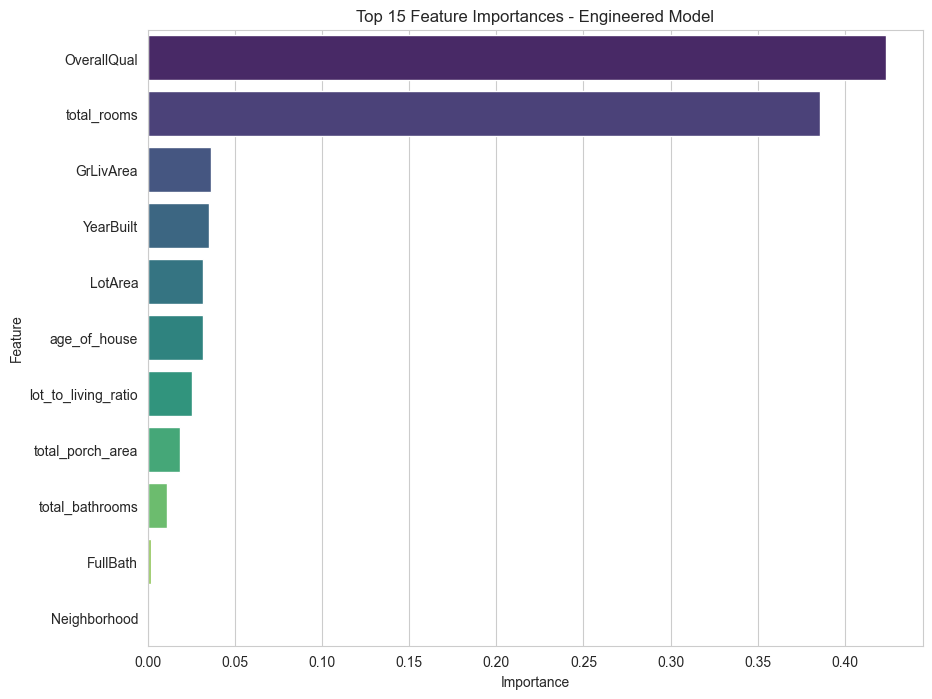

In [64]:

feature_importances = pd.DataFrame({
    'Feature': X_engineered.columns,
    'Importance': engineered_model.feature_importances_
})

top_features = feature_importances.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title("Top 15 Feature Importances - Engineered Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


### Analysis: Most Valuable Features

**Write 3-5 bullet points analyzing your results:**

- Some of my engineered features, like total_bathrooms, total_rooms, and age_of_house, showed up in the top 15 most important features.

- These did well because people care about having enough bathrooms, enough rooms, and a newer house usually costs more.

- Other features, like lot_to_living_ratio and total_porch_area, weren’t as important as I thought. Maybe buyers don’t care as much about porch size or how big the lot is compared to the house.

- I learned that making new features that actually matter to buyers can make the model better.

- Next time, I’d try adding features like total finished space or updated rooms because things like remodels probably make a house worth more.

---
## Step 6: Submit Your Work

Before submitting:
1. Make sure all code cells run without errors
2. Verify you have at least 5 engineered features with business justifications
3. Check that your comparison table and visualizations display correctly
4. Complete the analysis section above

Then push to GitHub:
```bash
git add .
git commit -m 'completed feature engineering assignment'
git push
```

Submit your GitHub repository link on the course platform.